<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<center><h1>Introduction to Pandas</h1></center>

`pandas` is a Python package that provides a powerful tool, the `DataFrame`, which is a Python object that holds ***relational data***.  In this notebook we are going to introduce this tool and describe many important features and operations.
    
<center><h2>Relational Data</h2></center>

Relational data is data that captures associations or relationships between data points.  This is often expressed as a table with columns indicating the quantities related. For example, "First names" are associated with "Last Names".    

</div>

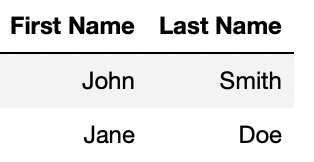

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This is a table with two columns, one column for First Name and one column for Last Name.


For the pedantic, a "relation" is a table with no duplicate entries.  We might, for example, have two John Smiths.  We can try to eliminate this collision problem by introducing an **Index**.
    
    
</div>

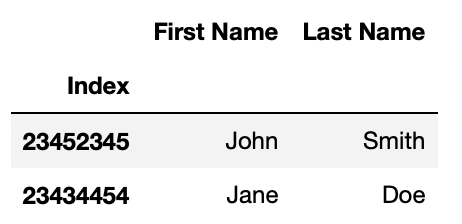

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

In the above table we have added an "Index".  The `DataFrame` object in Python is a representation of a table with these components.  It is composed of rows, each with an index, and labeled columns.
    
</div>

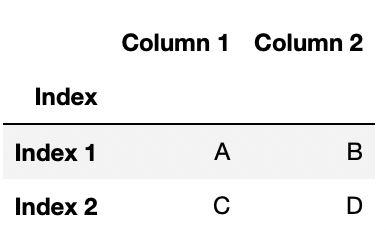

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

In a general `DataFrame`, we might have many different relations captured in the same table.  For example, a `DataFrame` with student data from a school might look something like this:
    
</div>

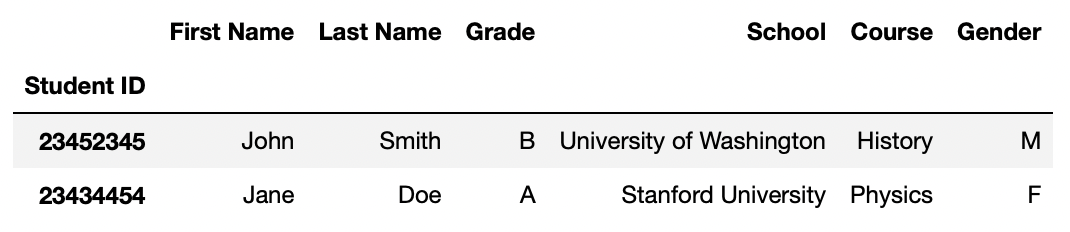

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

When thinking about data analysis, note that the above table already gives us something to think about regarding how choices of data representation affect conclusions.  What if someone only has one name?  What if they have a name that isn't easily represented as "First name/Last name"?  What if they come from a culture that keeps track of multiple names?  

Note there is a Gender column.  What if the person who constructed this data had created this column as `isFemale`?  

When interacting with tables and `DataFrames`, it is important to keep these issues in mind.  Structural choices about data can and will affect conclusions.  Whenever you make a `DataFrame` or use one someone else has constructed for you, you are making or dealing with these kinds of choices.
    
There are standard operations related to questions you might have about the students in the above `DataFrame`. 
<ul>
    <li> Which students took Physics?  </li>
    <li> Which students got an A in any course?  Which Students from the University of Washington got an A or B in either Physics or History? </li>
    </ul>

The `DataFrame` object has operations that allow these kinds of questions to be answered in a computationally efficient manner. These are covered in this tutorial.
    
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<center><h2>Many different relations</h2></center>

If we only needed to subselect from one table, we wouldn't really need something like `pandas` and its `DataFrame` (though it is helpful for this!).  The real power of the `DataFrame` object appears when we have multiple relations, i.e. multiple `DataFrame`s and we wish to combine them in some way.

For example we might have `DataFrame`s that represent student Grades, or Professors, or Schools. 
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

    

We might have a `DataFrame` of student's grades for a single course:
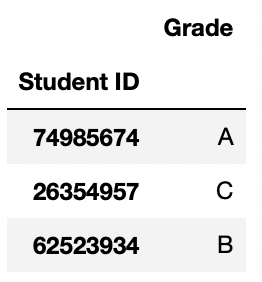

or a `DataFrame` with Courses offered by Departments in different schools:
    
</div>

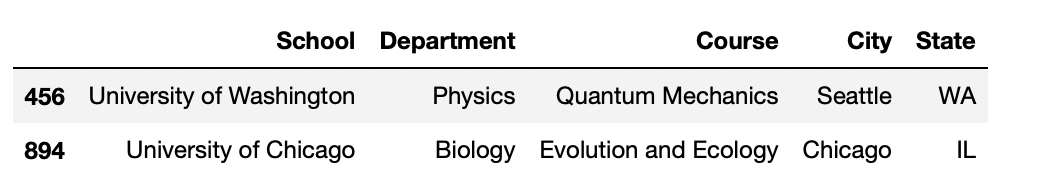

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

or a `DataFrame` of Professors and the Courses they teach

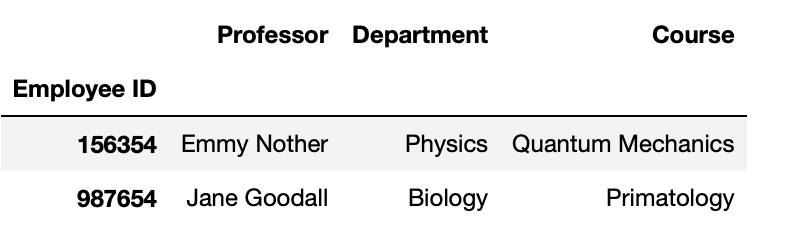
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The main purpose of `pandas` and the `DataFrame` object is to allow us to ask questions across multiple sets of relations.  

    
<ul>
    <li>What is the average score of students of course Y from professor X (who may have taught at different institutions….)?</li>
    <li>What is the average number of students at school X from State Y?</li>
    <li>What is the distribution of grades from students in Biology whose home town is Y?</li>
</ul>
    



`DataFrames` have powerful tools like `merge` to combine information from multiple `DataFrame`s that allow you to ask these kinds of questions quickly and easily.
    
Let's get started!  
    
</div>

# Scratch work.  Ignore beyond this point.

In [1]:
import pandas as pd

In [11]:
pd.DataFrame([['John','Smith'], ['Jane', 'Doe']], columns=['First Name', 'Last Name'], index=pd.Index([23452345, 23434454], name='Index'))

,First Name,Last Name
Index,,
23452345,John,Smith
23434454,Jane,Doe


In [12]:
pd.DataFrame([['A','B'], ['C', 'D']], columns=['Column 1', 'Column 2'], index=pd.Index(['Index 1', 'Index 2'], name='Index'))

,Column 1,Column 2
Index,,
Index 1,A,B
Index 2,C,D


In [ ]:
pd.DataFrame([[23452345, 23434454], ['John','Smith'], ['Jane', 'Doe']], columns=['Student ID', 'First Name', 'Last Name'], index_col

In [14]:
pd.DataFrame([['John','Smith','B', 'University of Washington', 'History', 'M'], ['Jane', 'Doe','A', 'Stanford University', 'Physics', 'F']], columns=['First Name', 'Last Name','Grade', 'School', 'Course', 'Gender' ], index=pd.Index([23452345, 23434454], name='Student ID'))

,First Name,Last Name,Grade,School,Course,Gender
Student ID,,,,,,
23452345,John,Smith,B,University of Washington,History,M
23434454,Jane,Doe,A,Stanford University,Physics,F


In [9]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If 

In [18]:
pd.DataFrame([['A'], ['C'], ['B']], columns=[ 'Grade'], index=pd.Index([74985674,26354957, 62523934], name='Student ID'))

,Grade
Student ID,
74985674,A
26354957,C
62523934,B


In [21]:
pd.DataFrame([['University of Washington', 'Physics', 'Quantum Mechanics', 'Seattle', 'WA'], ['University of Chicago', 'Biology', 'Evolution and Ecology', 'Chicago', 'IL']], columns=['School', 'Department', 'Course', 'City', 'State'], index=pd.Index([456,894]))

,School,Department,Course,City,State
456,University of Washington,Physics,Quantum Mechanics,Seattle,WA
894,University of Chicago,Biology,Evolution and Ecology,Chicago,IL


In [23]:
pd.DataFrame([['Emmy Nother', 'Physics', 'Quantum Mechanics'], ['Jane Goodall', 'Biology', 'Primatology']], columns=['Professor', 'Department', 'Course'], index=pd.Index([156354,987654],name='Employee ID'))

,Professor,Department,Course
Employee ID,,,
156354,Emmy Nother,Physics,Quantum Mechanics
987654,Jane Goodall,Biology,Primatology
